In [1]:
# Install necessary libraries
!pip install roboflow ultralytics scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 19.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


image = cv2.imread("/kaggle/input/under-water-test-data/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.aa1181594b280eb295b98af0176cafda.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
The image has dimensions 640x640 and 3 channels.


# YOLOv8 configuration

100%|██████████| 6.25M/6.25M [00:00<00:00, 84.7MB/s]



image 1/1 /kaggle/input/under-water-test-data/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.aa1181594b280eb295b98af0176cafda.jpg: 640x640 1 person, 6.7ms
Speed: 8.9ms preprocess, 6.7ms inference, 286.6ms postprocess per image at shape (1, 3, 640, 640)


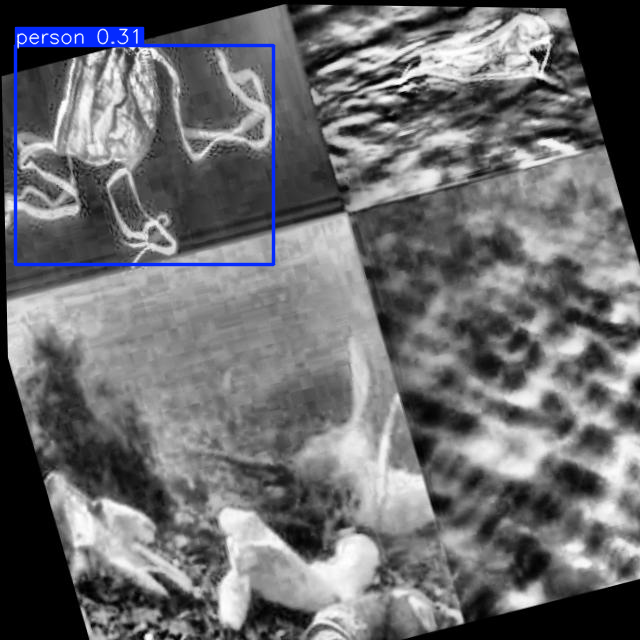

In [3]:
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/under-water-test-data/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.aa1181594b280eb295b98af0176cafda.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Fine-tuning process log of YOLOv8

In [4]:
# Install necessary libraries
!pip install roboflow

# Step 1: Import the required libraries
from roboflow import Roboflow
from ultralytics import YOLO

# Step 2: Initialize the Roboflow API with your API key
rf = Roboflow(api_key="WCiB8H5K2baSWDNNnWmF")

# Step 3: Access your project and version from Roboflow
project = rf.workspace("brain-stroke-detection").project("underwater-plastic-awg0w")
version = project.version(1)

# Step 4: Download the dataset in YOLOv8 format
dataset = version.download("yolov8")

# Step 5: Print the location where the dataset has been downloaded
print(f"Dataset downloaded to: {dataset.location}")

# Step 6: Load the YOLOv8 model (you need to make sure the yolov8n.yaml and yolov8n.pt files are available)
# Ensure you have access to the model architecture YAML file and the pre-trained weights.
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Step 7: Verify that the model has been loaded correctly
print(Final_model)

# Step 8: Train the model on your downloaded dataset
# Ensure that you pass the correct path to the data.yaml file from the dataset
# Set the number of epochs to your desired number (e.g., 25 epochs)
Final_model.train(
    data=dataset.location + '/data.yaml',  # Path to the dataset YAML file
    epochs=25,                             # Number of epochs for training
    imgsz=640,                             # Image size (resize all images to 640px for training)
    batch=16,                              # Batch size for training
    lr0=0.01,                              # Learning rate
    dropout=0.15,                          # Dropout rate (to prevent overfitting)
    device=0                                # Use GPU (set to 'cpu' if you want to train on CPU)
)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to underwater-plastic-1 in yolov8:: 100%|██████████| 24784/24784 [00:03<00:00, 6302.97it/s] 


Dataset downloaded to: /kaggle/working/underwater-plastic-1
Transferred 355/355 items from pretrained weights
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), str

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/underwater-plastic-1/train/labels... 10884 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10884/10884 [00:10<00:00, 1050.14it/s]


train: New cache created: /kaggle/working/underwater-plastic-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/underwater-plastic-1/valid/labels... 1001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:01<00:00, 759.15it/s]


val: New cache created: /kaggle/working/underwater-plastic-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.42G      1.611      3.187      1.788         13        640: 100%|██████████| 681/681 [02:15<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1001       1892      0.633       0.22      0.198      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.39G      1.564      2.511      1.731         16        640: 100%|██████████| 681/681 [02:11<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.34it/s]


                   all       1001       1892       0.78      0.219      0.248      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.37G      1.536      2.297      1.701          6        640: 100%|██████████| 681/681 [02:09<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.38it/s]


                   all       1001       1892      0.574      0.265       0.25      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.38G      1.534      2.157       1.69         29        640: 100%|██████████| 681/681 [02:10<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.30it/s]


                   all       1001       1892      0.627      0.236      0.249      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.51G      1.494      2.022      1.662         12        640: 100%|██████████| 681/681 [02:11<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.85it/s]


                   all       1001       1892      0.515      0.299       0.32      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       2.5G       1.47      1.909      1.641         18        640: 100%|██████████| 681/681 [02:10<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.14it/s]


                   all       1001       1892      0.824      0.312      0.375      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.41G      1.442      1.813      1.614         13        640: 100%|██████████| 681/681 [02:10<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all       1001       1892      0.669      0.334      0.384      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.38G      1.426      1.739      1.596         17        640: 100%|██████████| 681/681 [02:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.35it/s]

                   all       1001       1892      0.552      0.341      0.381      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.42G      1.402      1.679      1.589         28        640: 100%|██████████| 681/681 [02:09<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.35it/s]

                   all       1001       1892      0.688       0.42      0.485      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       2.5G      1.391      1.625      1.569         13        640: 100%|██████████| 681/681 [02:09<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.41it/s]

                   all       1001       1892       0.49      0.434      0.459      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.37G      1.371      1.573       1.56         25        640: 100%|██████████| 681/681 [02:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.41it/s]

                   all       1001       1892      0.632      0.416      0.454      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.38G      1.355      1.513      1.543         22        640: 100%|██████████| 681/681 [02:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all       1001       1892      0.559      0.431      0.458       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.38G      1.346      1.477      1.532         14        640: 100%|██████████| 681/681 [02:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all       1001       1892      0.609      0.483      0.546      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.41G       1.33      1.445      1.519         17        640: 100%|██████████| 681/681 [02:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.13it/s]

                   all       1001       1892      0.689      0.452      0.535      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.37G      1.308      1.401      1.506         10        640: 100%|██████████| 681/681 [02:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.34it/s]

                   all       1001       1892      0.593      0.509      0.543      0.326


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.38G      1.302      1.163      1.552         10        640: 100%|██████████| 681/681 [02:10<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.38it/s]

                   all       1001       1892      0.631      0.476      0.525      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.38G       1.28      1.087      1.528          4        640: 100%|██████████| 681/681 [02:09<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.39it/s]

                   all       1001       1892      0.636      0.505      0.541      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.41G      1.251      1.045      1.509          6        640: 100%|██████████| 681/681 [02:08<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]

                   all       1001       1892      0.658      0.528      0.581      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.37G      1.227     0.9866      1.482          8        640: 100%|██████████| 681/681 [02:09<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

                   all       1001       1892      0.624      0.592       0.62      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.38G      1.207     0.9554      1.465         14        640: 100%|██████████| 681/681 [02:10<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

                   all       1001       1892      0.661      0.586      0.626      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.38G      1.193     0.9275      1.455          7        640: 100%|██████████| 681/681 [02:09<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.30it/s]

                   all       1001       1892      0.636      0.634      0.661      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.38G      1.174      0.896       1.44          5        640: 100%|██████████| 681/681 [02:09<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                   all       1001       1892      0.668      0.614      0.667      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.37G      1.161     0.8751      1.426         18        640: 100%|██████████| 681/681 [02:08<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all       1001       1892      0.727       0.61      0.681      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.38G       1.14     0.8473      1.414          4        640: 100%|██████████| 681/681 [02:08<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]

                   all       1001       1892      0.696      0.637      0.696       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.45G      1.124     0.8311      1.404          8        640: 100%|██████████| 681/681 [02:08<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all       1001       1892      0.686      0.662      0.705      0.431



25 epochs completed in 0.952 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.35it/s]


                   all       1001       1892      0.686      0.662      0.705      0.431
                  Mask         77         90      0.941      0.529      0.755      0.479
                   can         18         20      0.769      0.499      0.609      0.228
             cellphone         61         71       0.95      0.972      0.984      0.838
           electronics         27         40      0.686        0.6       0.69      0.374
               gbottle         36         82        0.6      0.787      0.753      0.535
                 glove         37         55      0.822      0.764      0.839      0.639
                 metal         10         22      0.611      0.364      0.459      0.218
                  misc         49         52      0.528        0.5       0.51       0.27
                   net        146        148      0.854      0.885      0.916      0.595
                  pbag        290        330      0.803      0.961      0.956      0.765
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ecc9ff2650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

# Training performance metrics

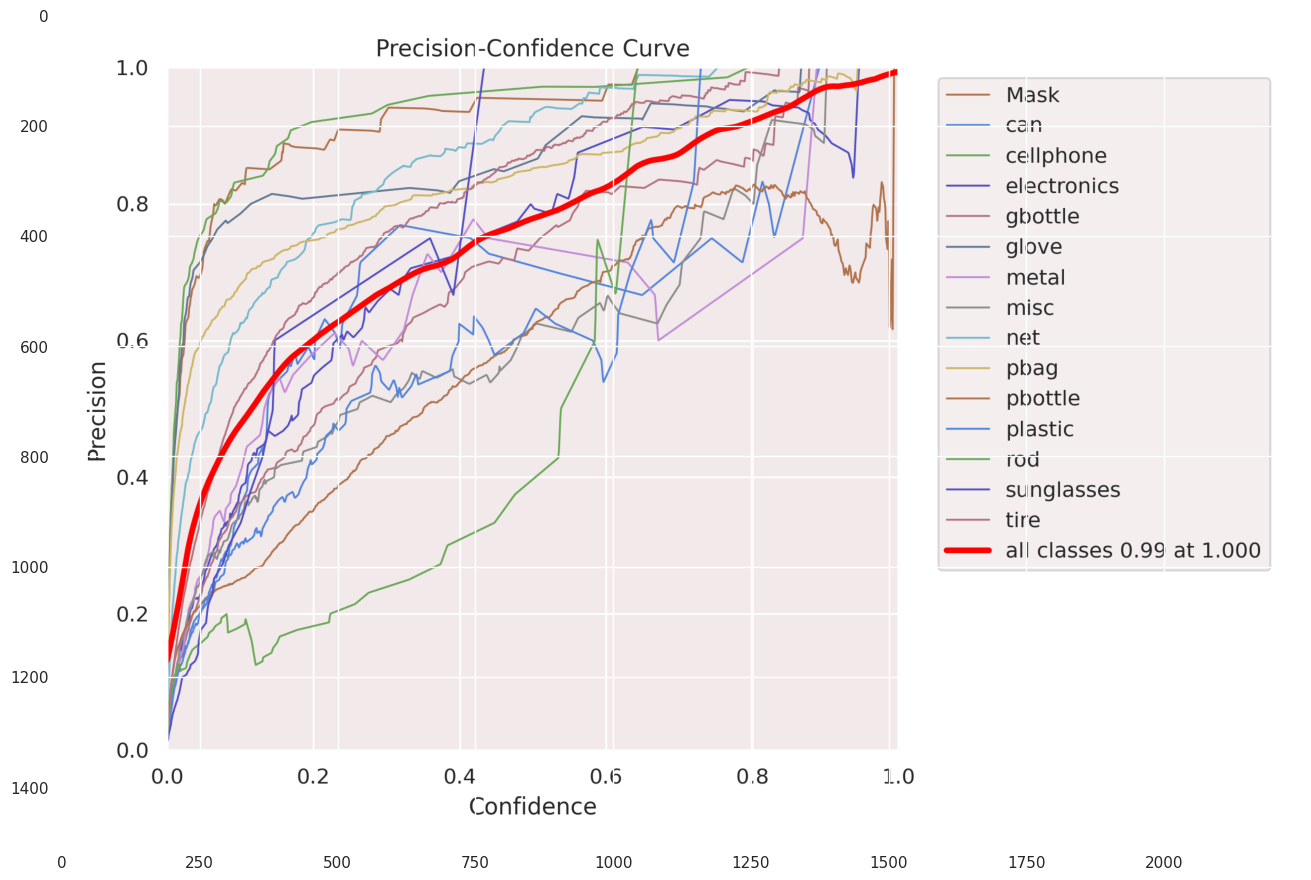

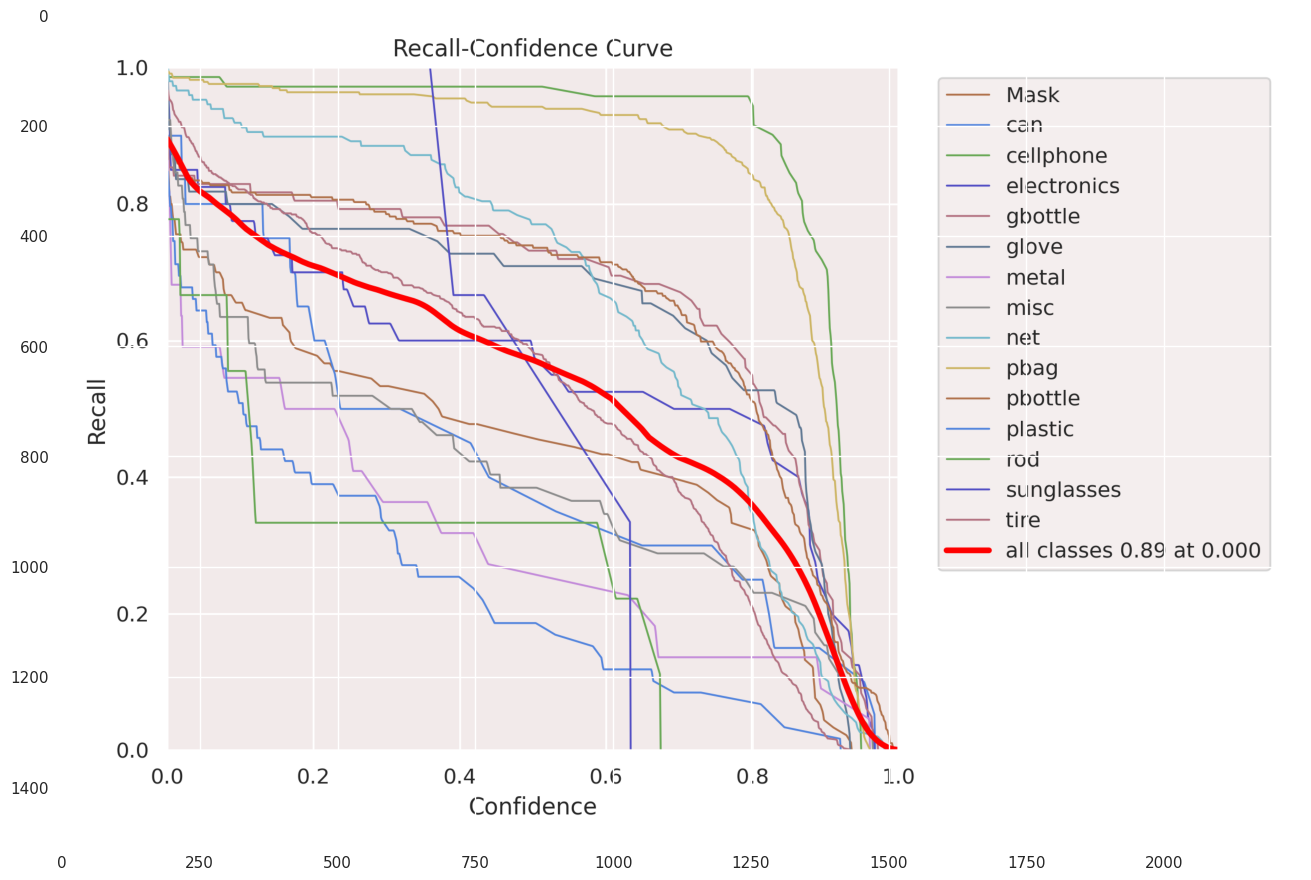

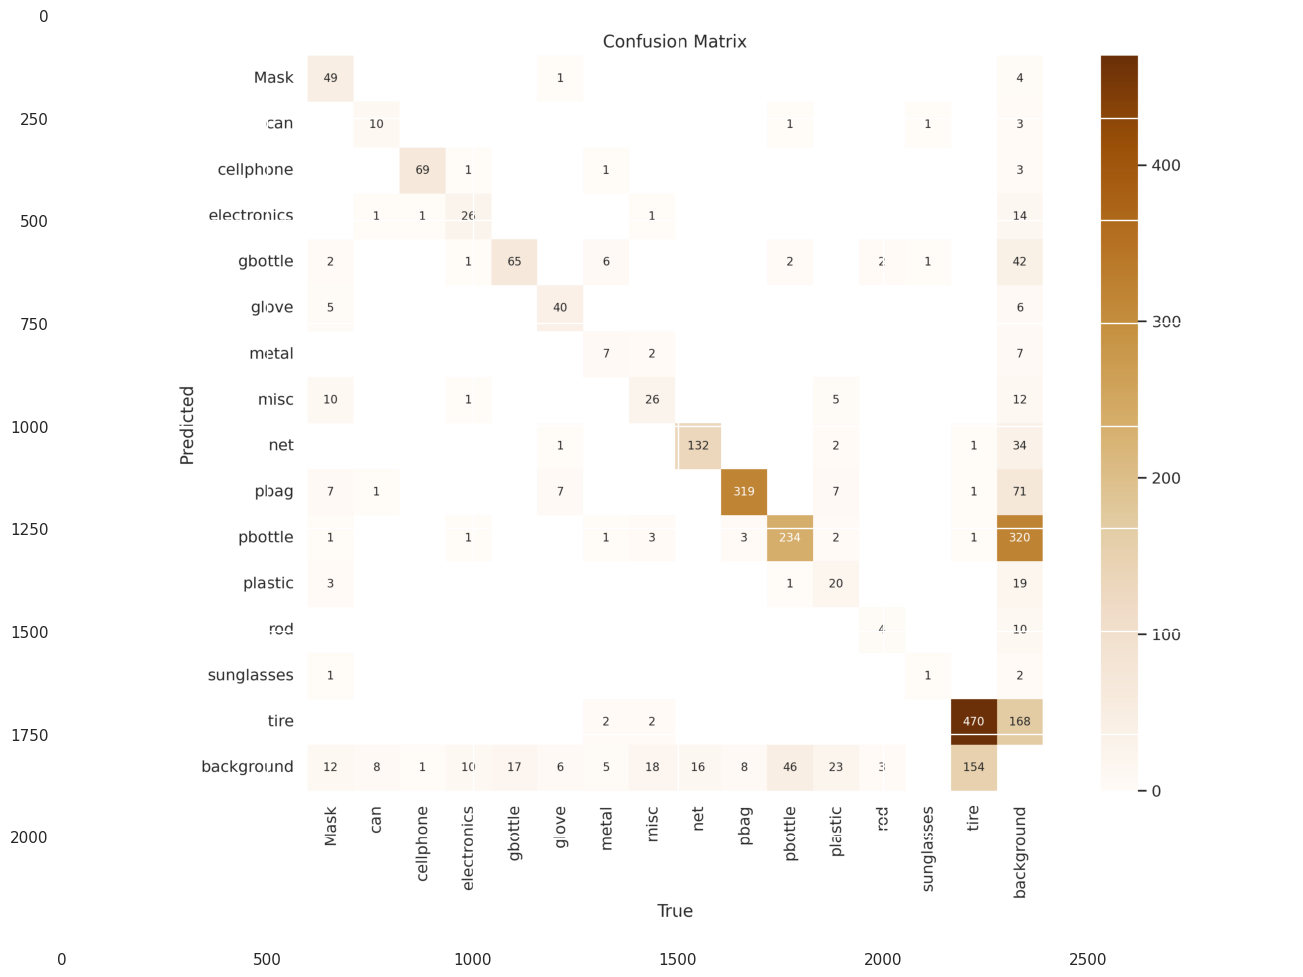

In [5]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"/kaggle/working/runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [6]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  146.947         1.61134         3.18683         1.78791   
1      2  286.016         1.56370         2.51074         1.73062   
2      3  422.148         1.53633         2.29661         1.70131   
3      4  559.138         1.53366         2.15652         1.69031   
4      5  698.473         1.49399         2.02237         1.66150   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.63301            0.21985           0.19798   
1               0.78006            0.21943           0.24794   
2               0.57434            0.26527           0.25012   
3               0.62749            0.23635           0.24865   
4               0.51484            0.29909           0.32012   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.11109       1.59203       2.35653       1.86685  0.000175   
1              0.14356       1.62196       2.26662       1.94816  0.000337   
2              0.13914       1.65875       2.26623       1.88332  0.000484   
3              0.14178       1.68503       2.26366       1.91971  0.000464   
4              0.18444       1.61254       1.91359       1.84782  0.000443   

     lr/pg1    lr/pg2  
0  0.000175  0.000175  
1  0.000337  0.000337  
2  0.000484  0.000484  
3  0.000464  0.000464  
4  0.000443  0.000443

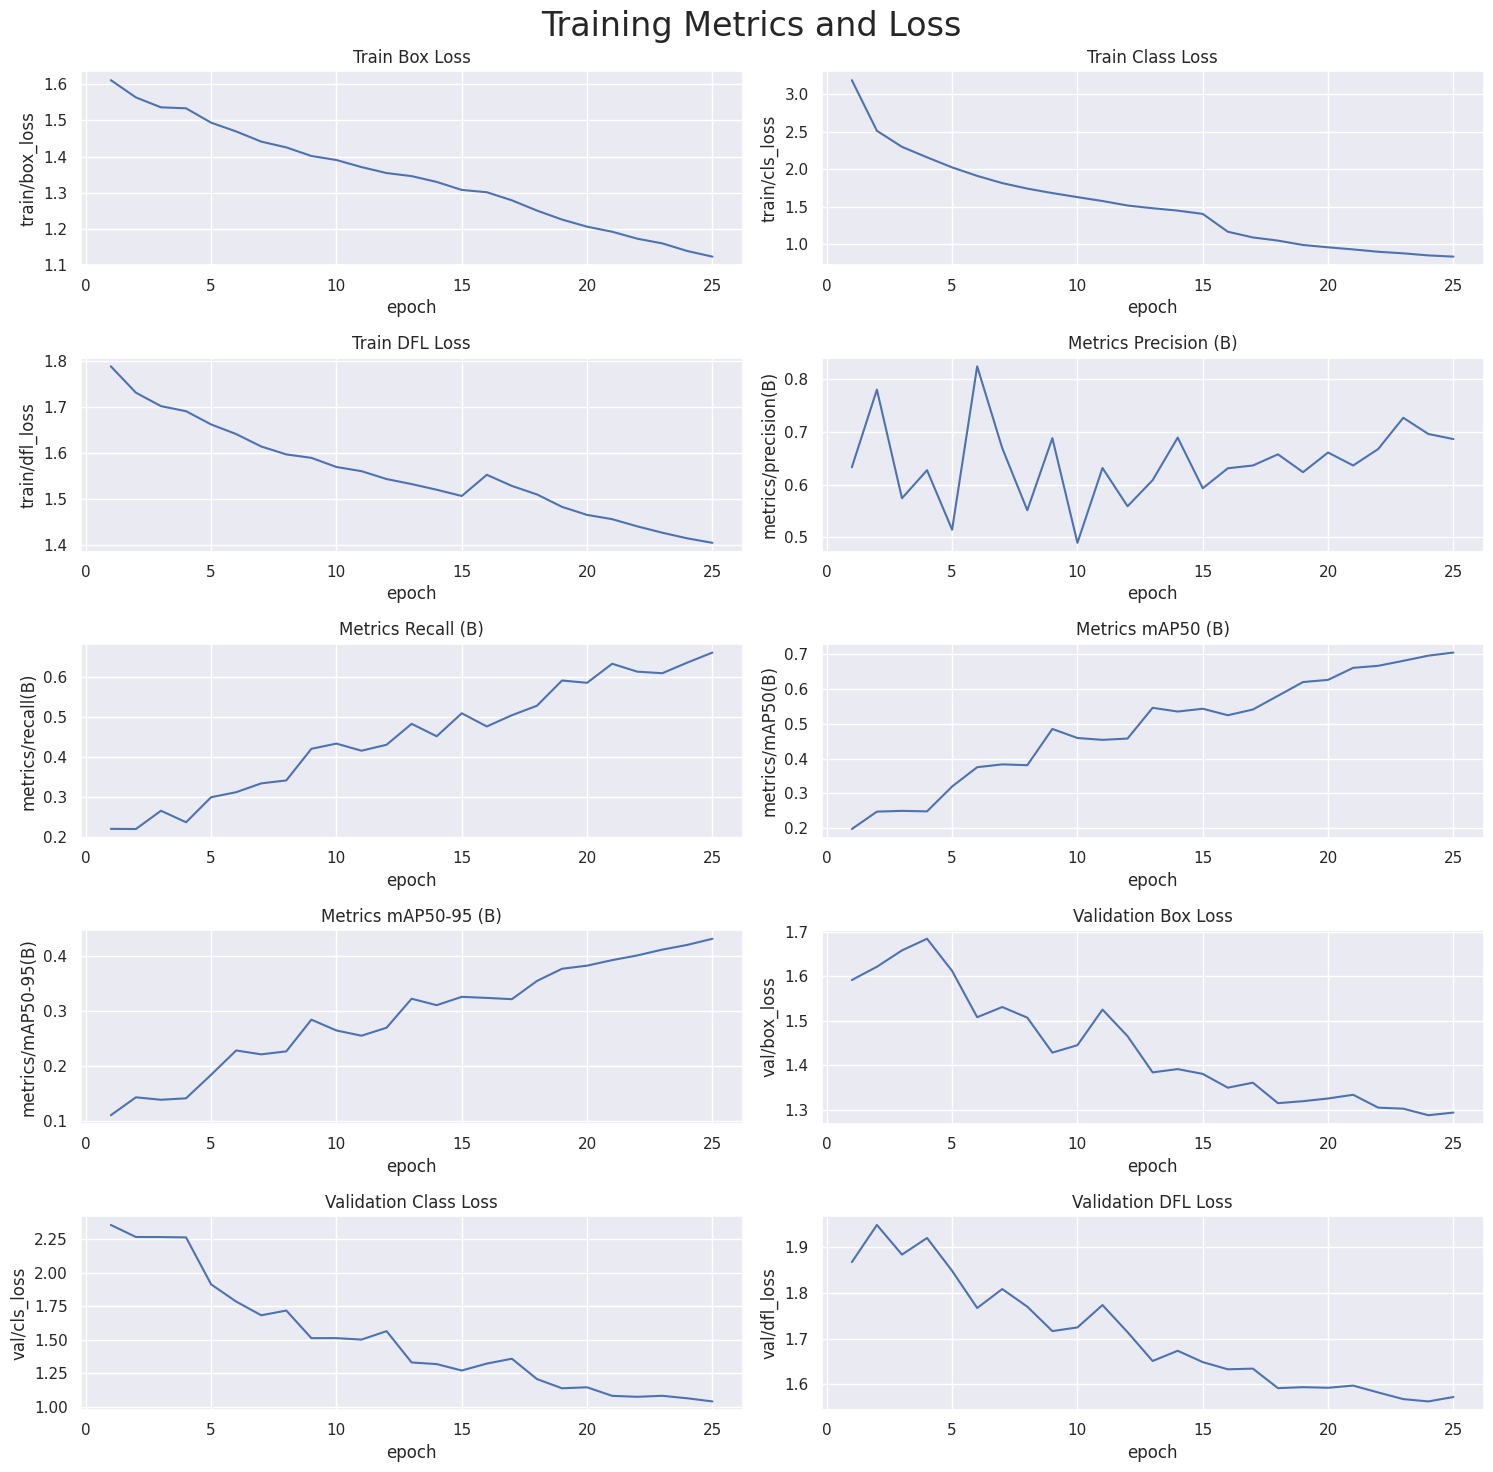

In [7]:
results.columns = results.columns.str.strip()
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

# Evaluation of fine-tuned model

In [8]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/underwater-plastic-1/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<00:00, 1044.76it/s]

val: New cache created: /kaggle/working/underwater-plastic-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]


                   all        501        966      0.705      0.684      0.719      0.426
                  Mask         33         37      0.954      0.561      0.821      0.593
                   can         13         19      0.719      0.474      0.619      0.264
             cellphone         40         46      0.965          1      0.995      0.795
           electronics         14         19      0.654      0.842      0.813      0.475
               gbottle         27         63      0.779      0.556      0.619      0.373
                 glove         23         34      0.961      0.726        0.8      0.591
                 metal          2          5      0.312      0.369      0.214      0.127
                  misc         30         33      0.677      0.364      0.492      0.273
                   net         63         65      0.887      0.815      0.892      0.533
                  pbag        128        166      0.781       0.97      0.954      0.777
               pbottl

In [9]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.7045266621021048
metrics/recall(B):  0.683835453545827
metrics/mAP50(B):  0.7189983977356055
metrics/mAP50-95(B):  0.42594713461858885


# Visual inspection and use of fine-tund YOLOv8 first-hand


image 1/1 /kaggle/working/underwater-plastic-1/test/images/uwg_g-1194__fliph_jpg.rf.0b15e5a9263e1c47b2297abc63be3452.jpg: 640x640 3 tires, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


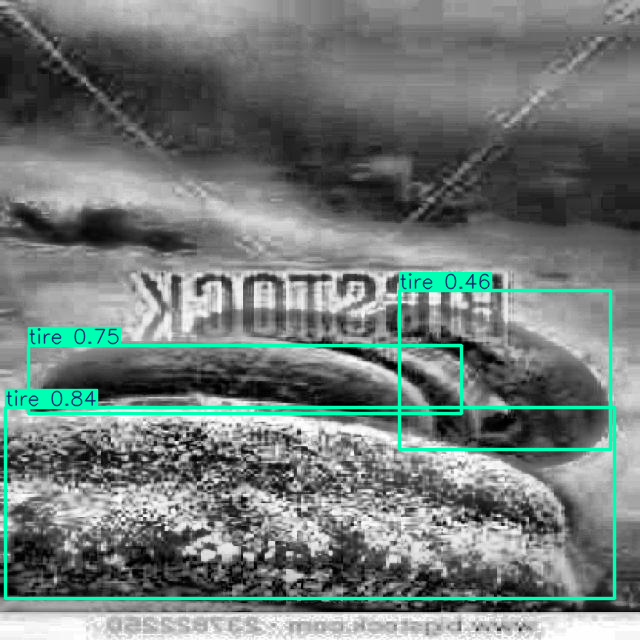


image 1/1 /kaggle/working/underwater-plastic-1/test/images/uwg_g-76__fliph_jpg.rf.6186167cd0d0251fd8bac1ed01c9535f.jpg: 640x640 1 net, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


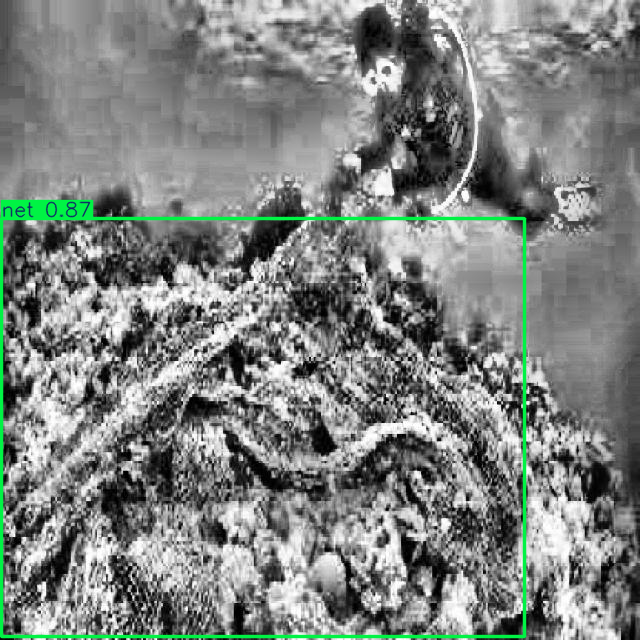


image 1/1 /kaggle/working/underwater-plastic-1/test/images/uwg_g-3__flipv_jpg.rf.29f20d463f94ee5f8af4cce5c766282a.jpg: 640x640 1 net, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


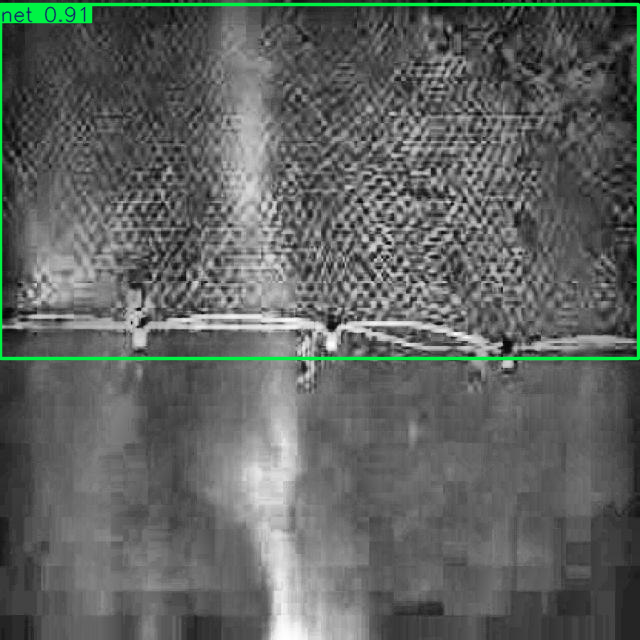


image 1/1 /kaggle/working/underwater-plastic-1/test/images/uwg_g-274__flipv_jpg.rf.7a16c62cf1aaabcffb3b029fc2669e38.jpg: 640x640 1 gbottle, 1 tire, 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


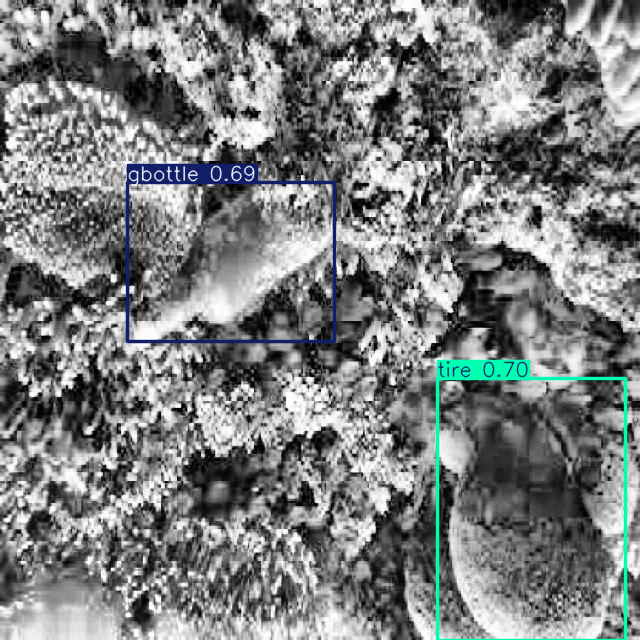


image 1/1 /kaggle/working/underwater-plastic-1/test/images/uwg_g-279_jpg.rf.c775ef7e5948f83d1651ab0323f82931.jpg: 640x640 (no detections), 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


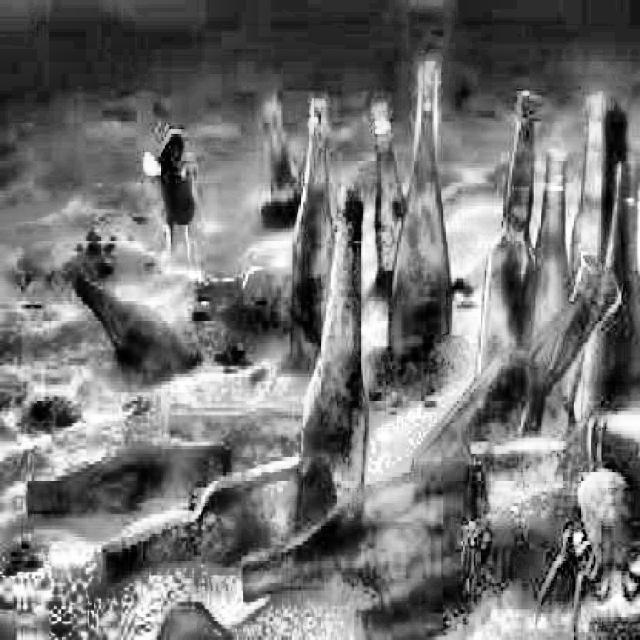

In [10]:
images = os.listdir("/kaggle/working/underwater-plastic-1/test/images")
for i in range(5):
    image = os.path.join("/kaggle/working/underwater-plastic-1/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))